In [299]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
%matplotlib inline

df = pd.read_csv('./Udacity/survey_results_public.csv')
df.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.count()

Respondent              51392
Professional            51392
ProgramHobby            51392
Country                 51392
University              51392
                        ...  
QuestionsInteresting    34536
QuestionsConfusing      34419
InterestedAnswers       34612
Salary                  12891
ExpectedSalary           2566
Length: 154, dtype: int64

 ### 1 - What are the top 10 known languages among the professional developers?

In [77]:
df["Professional"].value_counts() /  df["Professional"].value_counts().sum() # see the percentage of respondents professions

Professional developer                                  0.703047
Student                                                 0.160025
Professional non-developer who sometimes writes code    0.100016
Used to be a professional developer                     0.019127
None of these                                           0.017785
Name: Professional, dtype: float64

In [79]:
df_dev = df[df["Professional"] == "Professional developer"] # creating a data frame with only Professional developers
df_dev.head()


,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,8,Professional developer,"Yes, both",Poland,No,Employed full-time,Master's degree,Computer science or software engineering,All or almost all the time (I'm full-time remote),Fewer than 10 employees,...,Somewhat agree,Male,A master's degree,White or of European descent,Agree,Somewhat agree,Disagree,Agree,NaN,NaN
8,9,Professional developer,"Yes, I program as a hobby",Colombia,"Yes, part-time",Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","5,000 to 9,999 employees",...,Strongly disagree,Male,A bachelor's degree,Hispanic or Latino/Latina,Somewhat agree,Strongly agree,Disagree,Strongly agree,NaN,NaN
9,10,Professional developer,"Yes, I program as a hobby",France,"Yes, full-time","Independent contractor, freelancer, or self-em...",Master's degree,Computer science or software engineering,It's complicated,NaN,...,Disagree,Male,A doctoral degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,NaN,NaN


In [80]:
df_dev["HaveWorkedLanguage"].value_counts() # look at the Which of the following languages are used in the development"


C#; JavaScript; SQL                                              1211
JavaScript; PHP; SQL                                              983
Java                                                              685
JavaScript                                                        619
Java; JavaScript; SQL                                             596
                                                                 ... 
C#; Clojure; JavaScript; PHP; Python; SQL; Swift                    1
C; C++; Java; JavaScript; Python; Scala; SQL; TypeScript            1
Java; JavaScript; Matlab; PHP; SQL; Swift                           1
Groovy; Java; JavaScript; Perl; Python; Ruby; SQL; TypeScript       1
C++; JavaScript; Perl; PHP; Python; SQL                             1
Name: HaveWorkedLanguage, Length: 6472, dtype: int64

In [81]:
df_dev["HaveWorkedLanguage"].isnull().sum() # Checking if the columns has null values

8692

In [82]:
# drop any rows with missing values
df_work = df_dev["HaveWorkedLanguage"].dropna(axis=0)
df_work

2                                        Java; PHP; Python
7        CoffeeScript; Clojure; Elixir; Erlang; Haskell...
8                                           C#; JavaScript
9                                       Objective-C; Swift
13                             Java; JavaScript; Ruby; SQL
                               ...                        
51383             JavaScript; Objective-C; PHP; SQL; Swift
51384                                           JavaScript
51386                  C++; C#; Java; JavaScript; PHP; SQL
51387             C#; JavaScript; Python; SQL; VB.NET; VBA
51390                               JavaScript; PHP; Swift
Name: HaveWorkedLanguage, Length: 27439, dtype: object

In [94]:
# split the multiple languages for each respondent and create list of languages

def split_and_append(df_work):
    ind_languages = []
    for langs in df_work:
        if ';' in langs:
            temp_list = langs.split('; ')
            ind_languages += temp_list
        else:
            ind_languages.append(langs)

    return ind_languages

In [103]:
# and then create a dataframe with the counting the number of each languages 
languages = split_and_append(df_work)
all_languages=pd.DataFrame((x,languages.count(x)) for x in set(languages)) 


all_languages.rename(columns={0:"language",1:"count"},inplace=True) # setting up the column names
all_languages=all_languages.set_index("language") # setting up the index
all_languages.sort_values("count", ascending=False, inplace=True) # sort descending to see the top 10 languages
top_10_languages=all_languages[0:10] #only top 10 languages
top_10_languages

,count
language,
JavaScript,18421
SQL,14836
Java,10586
C#,10129
Python,7613
PHP,7523
C++,5326
C,4262
TypeScript,3117


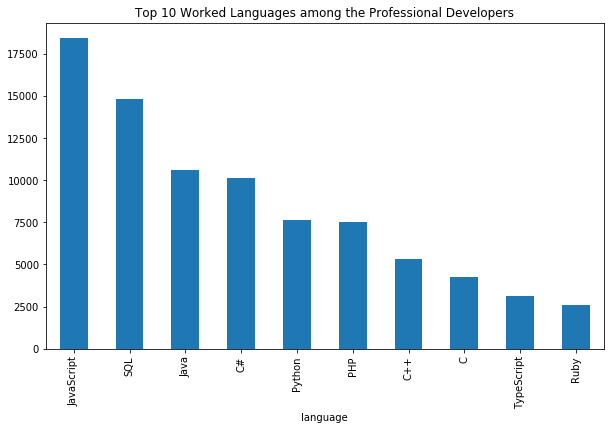

In [96]:
top_10_languages.plot(kind='bar', legend=None, figsize=(10,6));
plt.title("Top 10 Worked Languages among the Professional Developers");
plt.show()

 - JavaScript is the most popular programming language for the professional developers

## 2- How is it going to change the worked language in the future?

In [99]:
df_dev["WantWorkLanguage"].value_counts() # look at the Which of the following languages are mostly tended to be worked with in the future"

JavaScript                                                      518
C#; JavaScript; SQL                                             417
Java                                                            412
C#                                                              382
C#; JavaScript; SQL; TypeScript                                 314
                                                               ... 
Elixir; Go; JavaScript; SQL                                       1
C; CoffeeScript; Elixir; Objective-C; PHP; Ruby; Swift            1
C; C++; Java; JavaScript; Objective-C; PHP; Python; Swift         1
Clojure; Elixir; Erlang; Java; JavaScript; TypeScript             1
Assembly; C; Go; JavaScript; PHP; Python; R; Ruby; Rust; SQL      1
Name: WantWorkLanguage, Length: 8660, dtype: int64

In [104]:
# By using the same function we have create earlier
# and then create a dataframe with the counting the number of each languages 
df_want = df_dev["WantWorkLanguage"].dropna(axis=0)  # droping any null values

languages = split_and_append(df_want)
new_languages=pd.DataFrame((x,languages.count(x)) for x in set(languages)) 

new_languages.rename(columns={0:"language",1:"count"},inplace=True) # setting up the column names
new_languages=new_languages.set_index("language") # setting up the index
new_languages.sort_values("count", ascending=False, inplace=True) # sort descending to see the top 10 languages
top_10_languages_new=new_languages[0:10] #only top 10 languages
top_10_languages_new

,count
language,
JavaScript,12755
SQL,8531
Python,8386
C#,7957
Java,7102
TypeScript,5033
C++,4864
Go,4600
PHP,3600


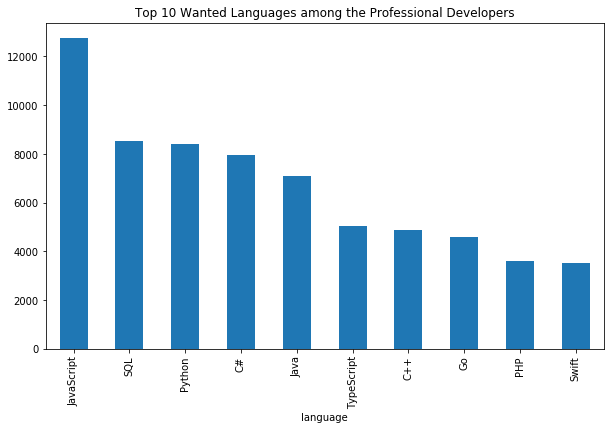

In [105]:
top_10_languages_new.plot(kind='bar', legend=None, figsize=(10,6));
plt.title("Top 10 Wanted Languages among the Professional Developers");
plt.show()



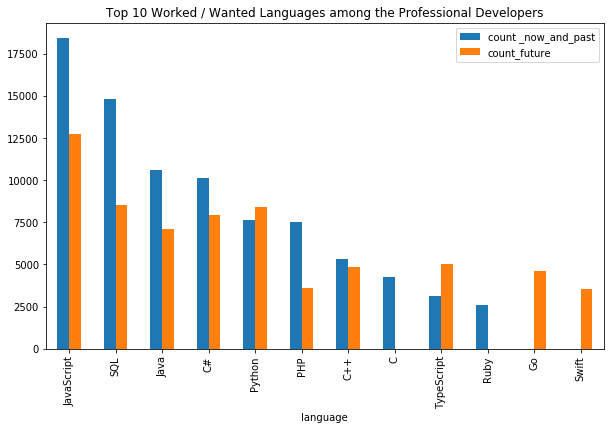

In [119]:
x=top_10_languages.merge(top_10_languages_new, left_on='language', right_on='language', how="outer",  suffixes=(" _now_and_past", '_future'))
x.plot(kind='bar', legend=True, figsize=(10,6), label=["now","future"]);
plt.title("Top 10 Worked / Wanted Languages among the Professional Developers");
plt.show()

- The JavaScript language is still the top language.
- C and Ruby dissapear from the top 10.

## 3- Which one is the most famous language among the students?

In [126]:
# Filtering only data frame including only students
df_students= df[df["Professional"] == "Student"]
df_students["WantWorkLanguage"]


0                                                    Swift
1                                  Java; Python; Ruby; SQL
5        Clojure; Elixir; Erlang; Haskell; Rust; TypeSc...
43                                                     NaN
45                                                     NaN
                               ...                        
51367    Assembly; C; C++; Common Lisp; Go; Haskell; Ja...
51369    C; C++; Haskell; JavaScript; Python; Swift; Ty...
51376        C++; Go; Java; JavaScript; Python; SQL; Swift
51379                                          Matlab; VBA
51388    C#; Java; JavaScript; PHP; Python; Ruby; SQL; ...
Name: WantWorkLanguage, Length: 8224, dtype: object

In [130]:
#By using the same function we have create earlier and then create a dataframe with the counting the number of each languages 
df_students_lang = df_students["WantWorkLanguage"].dropna(axis=0)  # droping any null values

student_languages = split_and_append(df_students_lang)
student_new_languages=pd.DataFrame((x,student_languages.count(x)) for x in set(student_languages)) 

student_new_languages.rename(columns={0:"language",1:"count"},inplace=True) # setting up the column names
student_new_languages=student_new_languages.set_index("language") # setting up the index
student_new_languages.sort_values("count", ascending=False, inplace=True) # sort descending to see the top 10 languages

student_new_languages.head()

,count
language,
Python,2083
JavaScript,1919
Java,1851
C++,1764
SQL,1295


Thus, the most famous language is "Python" among the students whereas the professional developers are still using JavaScript at most.

## 4 - Does increase of the known number of languages have positive affect on the Salary?

In [217]:
df_work_sal = df[["HaveWorkedLanguage","Salary"]].dropna(axis=0) #Filter only worked languages and Salary columns
df_work_sal.reset_index(drop=True,inplace = True)
df_work_sal.head()

,HaveWorkedLanguage,Salary
0,Java; PHP; Python,113750.0
1,Assembly; C; C++,100000.0
2,C; Clojure; JavaScript; Matlab; Rust; SQL; Swift,130000.0
3,Java,100764.0
4,Java; Scala,175000.0


In [223]:
# split the multiple languages for each respondent and count a number of languages
def split_and_count(x):
    temp_list=[]
    temp_list = x.split('; ')
    return len(temp_list)

df_work_sal["num_of_langs"] = df_work_sal.apply(lambda row: split_and_count(row['HaveWorkedLanguage']), axis=1)
df_work_sal.head()

df_work_sal

,HaveWorkedLanguage,Salary,num_of_langs
0,Java; PHP; Python,113750.000000,3
1,Assembly; C; C++,100000.000000,3
2,C; Clojure; JavaScript; Matlab; Rust; SQL; Swift,130000.000000,7
3,Java,100764.000000,1
4,Java; Scala,175000.000000,2
...,...,...,...
12123,Go; JavaScript; Python,74193.548387,3
12124,JavaScript; Objective-C; Python; Swift,107526.881720,4
12125,C#; JavaScript; TypeScript,32258.064516,3
12126,C#; JavaScript; Python; SQL; VB.NET; VBA,58000.000000,6


In [239]:
# grouping by number of languages and taking the average salary per number of languages
dfx =df_work_sal.groupby(["num_of_langs"]).mean()["Salary"] 
dfx.head()

num_of_langs
1    53202.325036
2    57888.283987
3    55213.482484
4    58317.869749
5    59163.122613
Name: Salary, dtype: float64

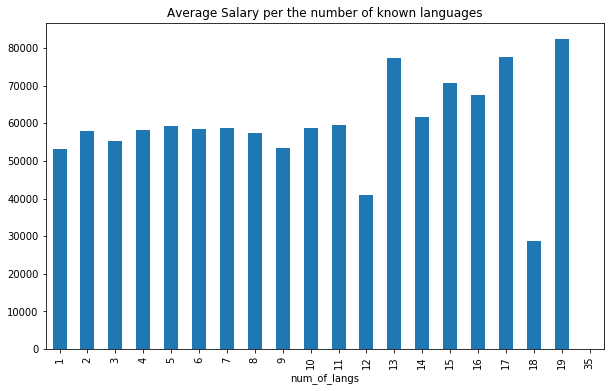

In [241]:
dfx.plot(kind='bar', legend=None, figsize=(10,6));
plt.title("Average Salary per the number of known languages");
plt.show()

Since, from the graph there is no strong increase or decrease of average salary per number of known languages. Lets check the Pearson Correlation

,Salary,num_of_langs
Salary,1.000000,0.023791
num_of_langs,0.023791,1.000000


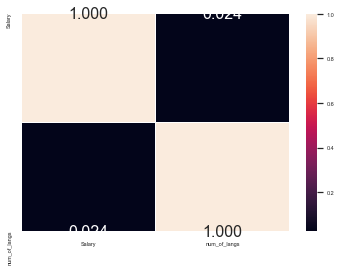

In [269]:

data = df_work_sal[["Salary","num_of_langs"]]
correlation = data.corr(method='pearson')

#fig, ax = plt.subplots(figsize=(8,8))         # Sample figsize in inches
sns.heatmap(correlation, annot=True, fmt=".3f", linewidths=.5,annot_kws={'size':16})

correlation

The correlation is very low, that is: 2,4%. It means there is no clear correlation between Salary and number of languages known.

## 5- How is the  career satisfaction by top 10 country participants ?

In [414]:
top10=list(df["Country"].value_counts()[:10].keys())
top10

['United States',
 'India',
 'United Kingdom',
 'Germany',
 'Canada',
 'France',
 'Poland',
 'Australia',
 'Russian Federation',
 'Spain']

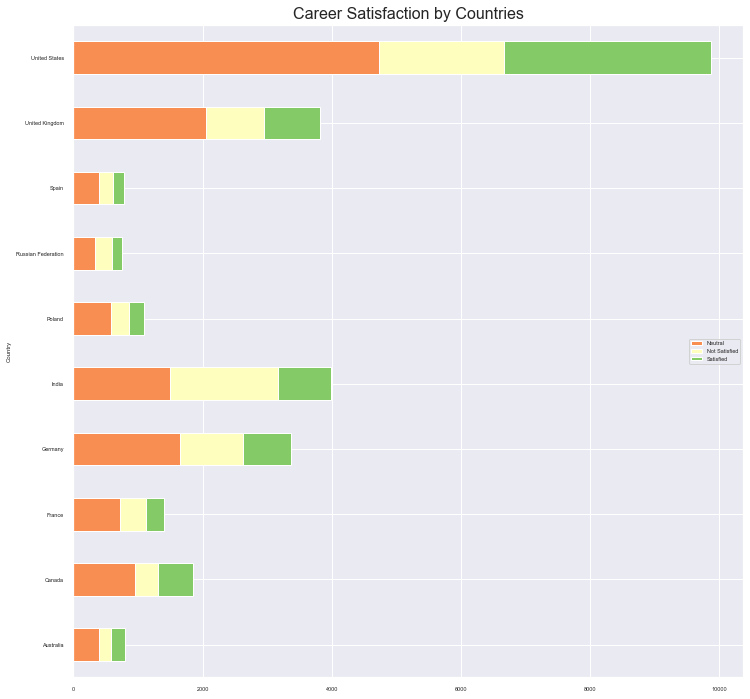

In [444]:

df_sat=df[["Country","CareerSatisfaction"]].dropna()

#NPS classification based on Satisfaction Score

def nps(x):
    if x < 7:
        return "Not Satisfied"
    if x < 9:
        return "Neutral"
    else:
        return "Satisfied"

df_sat["nps"] = df_sat["CareerSatisfaction"].apply(lambda x: nps(x))
x = pd.crosstab(df_sat["Country"],df_sat["nps"])
x = x[x.index.isin(top10)]

ax = x.plot(kind="barh",stacked=True,figsize=(12,12),color=sns.color_palette("RdYlGn", 3))
ax.legend(loc="center right")
plt.title("Career Satisfaction by Countries", fontsize=16)
plt.show()


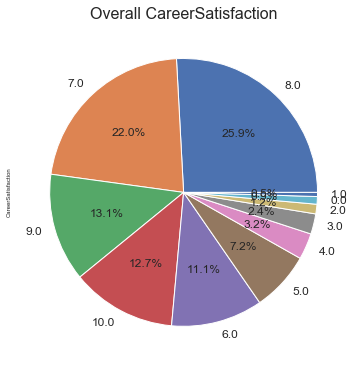

In [438]:
# How is the distribution of the Carier satisfaction score?

values=df["CareerSatisfaction"].value_counts()

plt.figure(figsize=(6,50))
values.plot.pie(autopct = "%1.1f%%", textprops={'fontsize': 12})
plt.title("Overall CareerSatisfaction",fontsize=16)
plt.show()


## 6 - What are the other affects on Career Satisfaction?
Lets look the number of Years Programmed, number of Years Coded and other four paramaters 


In [505]:

df_job= df[["CareerSatisfaction","Professional","YearsProgram","YearsCodedJob","ProgramHobby","LearningNewTech","HomeRemote","Gender"]]

df_job.head()

,CareerSatisfaction,Professional,YearsProgram,YearsCodedJob,ProgramHobby,LearningNewTech,HomeRemote,Gender
0,NaN,Student,2 to 3 years,NaN,"Yes, both",Agree,NaN,Male
1,NaN,Student,9 to 10 years,NaN,"Yes, both",NaN,"More than half, but not all, the time",Male
2,8.0,Professional developer,20 or more years,20 or more years,"Yes, both",Strongly agree,"Less than half the time, but at least one day ...",Male
3,6.0,Professional non-developer who sometimes write...,14 to 15 years,9 to 10 years,"Yes, both",Strongly agree,"Less than half the time, but at least one day ...",Male
4,6.0,Professional developer,20 or more years,10 to 11 years,"Yes, I program as a hobby",NaN,Never,NaN


In [506]:

df_job_dropna = df_job.dropna(axis=0) # drop any rows with missing values
cat_cols=df_job_dropna.select_dtypes(include=("object")).columns # select the categorical columns


df_job_dropna = df_job_dropna[df_job_dropna["Gender"].isin(["Male","Female"])] # Filtering only male and female genders

df_job_dropna.head()


,CareerSatisfaction,Professional,YearsProgram,YearsCodedJob,ProgramHobby,LearningNewTech,HomeRemote,Gender
2,8.0,Professional developer,20 or more years,20 or more years,"Yes, both",Strongly agree,"Less than half the time, but at least one day ...",Male
3,6.0,Professional non-developer who sometimes write...,14 to 15 years,9 to 10 years,"Yes, both",Strongly agree,"Less than half the time, but at least one day ...",Male
8,6.0,Professional developer,13 to 14 years,7 to 8 years,"Yes, I program as a hobby",Strongly agree,"Less than half the time, but at least one day ...",Male
14,8.0,Professional developer,20 or more years,20 or more years,"Yes, I program as a hobby",Agree,All or almost all the time (I'm full-time remote),Male
15,8.0,Professional developer,11 to 12 years,1 to 2 years,"Yes, I program as a hobby",Strongly agree,All or almost all the time (I'm full-time remote),Male


In [507]:
# Creating dummy variables for catagorical columns
def create_dummy_df(df, cat_cols, dummy_na):
    '''
    INPUT:
    df - pandas dataframe with categorical variables you want to dummy
    cat_cols - list of strings that are associated with names of the categorical columns
    dummy_na - Bool holding whether you want to dummy NA vals of categorical columns or not

    OUTPUT:
    df - a new dataframe that has the following characteristics:
            1. contains all columns that were not specified as categorical
            2. removes all the original columns in cat_cols
            3. dummy columns for each of the categorical columns in cat_cols
            4. if dummy_na is True - it also contains dummy columns for the NaN values
            5. Use a prefix of the column name with an underscore (_) for separating
    '''
    for col in cat_cols:
        try:
            # for each cat add dummy var, drop original column
            df = pd.concat([df.drop(col, axis=1),
                            pd.get_dummies(df[col], prefix=col, prefix_sep='_', drop_first=True, dummy_na=dummy_na)],
                           axis=1)
        except:
            continue
    return df

dff = create_dummy_df(df_job_dropna, cat_cols, dummy_na= False)
dff.head()

,CareerSatisfaction,Professional_Professional non-developer who sometimes writes code,Professional_Student,YearsProgram_10 to 11 years,YearsProgram_11 to 12 years,YearsProgram_12 to 13 years,YearsProgram_13 to 14 years,YearsProgram_14 to 15 years,YearsProgram_15 to 16 years,YearsProgram_16 to 17 years,...,LearningNewTech_Somewhat agree,LearningNewTech_Strongly agree,LearningNewTech_Strongly disagree,HomeRemote_About half the time,HomeRemote_All or almost all the time (I'm full-time remote),HomeRemote_It's complicated,"HomeRemote_Less than half the time, but at least one day each week","HomeRemote_More than half, but not all, the time",HomeRemote_Never,Gender_Male
2,8.0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,1
3,6.0,1,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,1,0,0,1
8,6.0,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,1,0,0,1
14,8.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
15,8.0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,1


In [511]:
    # Split into explanatory and response variables
    X = dff.drop(["CareerSatisfaction"], axis=1)
    y = dff["CareerSatisfaction"]
    
   # Split into train and test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
    
    
    lm_model = LinearRegression(normalize=True)  # Using Linear regression model and normalize it.
    lm_model.fit(X_train, y_train)  # Fit
    
    # Predict using the model
    y_test_preds = lm_model.predict(X_test)
    y_train_preds = lm_model.predict(X_train)
    
    # Score using the model
    test_score = r2_score(y_test, y_test_preds)
    train_score = r2_score(y_train, y_train_preds)
    
    # Looking into the coefficients of the model
    coefs_df = pd.DataFrame()
    coefs_df['est_int'] = X_train.columns
    coefs_df['coefs'] = lm_model.coef_
    coefs_df['abs_coefs'] = np.abs(lm_model.coef_)
    coefs_df = coefs_df.sort_values('abs_coefs', ascending=False)

print("The test score of the Regression Model is {:.2f}".format(test_score))
print("The train score of the Regression Model is {:.2f}".format(train_score))

print("Top Coefficients are:")
coefs_df.head()
    

The test score of the Regression Model is 0.03
The train score of the Regression Model is 0.05
Top Coefficients are:


,est_int,coefs,abs_coefs
48,LearningNewTech_Strongly disagree,-1.988197,1.988197
33,YearsCodedJob_20 or more years,0.834497,0.834497
31,YearsCodedJob_19 to 20 years,0.763902,0.763902
29,YearsCodedJob_17 to 18 years,0.646166,0.646166
30,YearsCodedJob_18 to 19 years,0.601239,0.601239


As it is expected that, the number of years coded have more influence on the "Career Satisfaction", whereas the participants who does not agree on "learning new technologies as fun" are negatively correlated on satisfaction results.